In [1]:
import pandas as pd
import numpy as np
import math
from layer import *  # HiddenLayer, LastLayer
from network import * # Network

In [2]:
train_x = pd.read_csv("DataPreprocessing/train_x.csv")
train_y = pd.read_csv("DataPreprocessing/train_y.csv")
test_x = pd.read_csv("DataPreprocessing/test_x.csv")

### train_x

In [3]:
print("Shape:", train_x.shape)
display(train_x.head())

Shape: (891, 12)


,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,1,0.273456,1,0,0.014151,0,0,1,0,0,1
1,2,0,0.473882,1,0,0.139136,1,0,0,1,0,0
2,3,0,0.323563,0,0,0.015469,0,0,1,0,0,1
3,4,0,0.436302,1,0,0.103644,0,0,1,1,0,0
4,5,1,0.436302,0,0,0.015713,0,0,1,0,0,1


### train_y

In [4]:
print("Shape:", train_y.shape)
display(train_y.head())

Shape: (891, 2)


,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


### test_x

In [5]:
print("Shape:", test_x.shape)
display(test_x.head())

Shape: (418, 12)


,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,1,0.430039,0,0,0.015282,0,1,0,0,0,1
1,893,0,0.586622,1,0,0.013663,0,0,1,0,0,1
2,894,1,0.774521,0,0,0.018909,0,1,0,0,1,0
3,895,1,0.336089,0,0,0.016908,0,0,1,0,0,1
4,896,0,0.273456,1,1,0.023984,0,0,1,0,0,1


In [6]:
# The PassengerId is not really important either
train_x = train_x.drop("PassengerId", axis=1)
train_y = train_y.drop("PassengerId", axis=1)
test_x = test_x.drop("PassengerId", axis=1)

In order to use the neural network, the data **MUST BE TRANSPOSED**, to look like this:
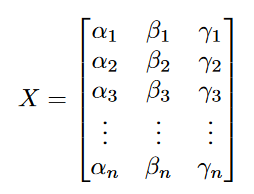
For this approach of the titanic exercise $n=1127$

In [7]:
train_x = np.array(train_x).T
train_y = np.array(train_y).T
test_x = np.array(test_x).T

In [8]:
train_x.shape

(11, 891)

In [9]:
train_y.shape

(1, 891)

In [10]:
test_x.shape

(11, 418)

# Model - how to use

In [11]:
# First define the activation function
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

activation = relu
derivative = relu_derivative

In [12]:
# Define the layers
hidden1 = HiddenLayer([train_x.shape[0], 300], activation, derivative)
hidden2 = HiddenLayer([300, 10], activation, derivative)
out = LastLayer([10, 1], activation, derivative)

In [13]:
# Train the network
net = Network([hidden1,  hidden2, out])
net.fit(train_x, train_y, batch_size=30, epochs=200, learning_rate=0.1)

Epoch: 199	Error:0.13132957257241578

In [14]:
# Get the results
result = net.foward_propagate(test_x)[-1]  # [-1] because the results are at the end of the list
result = [1 if x>=0.5 else 0 for x in result[0]]  # making results binary

In [15]:
results = {
    "PassengerId": [i for i in range(892, 892+418)],
    "Survived": result
}
results = pd.DataFrame(results)
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [16]:
results.to_csv("results.csv", index=False)

# Score: 77.0%
### *Escolhi usar apenas 11 features para treinar o modelo.
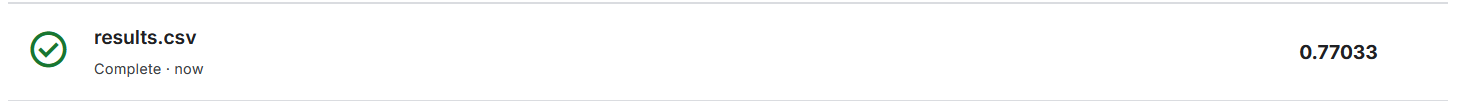

https://www.kaggle.com/competitions/titanic/overview